In [ ]:
!pip install --upgrade pyswarm
# !pip install shap==0.37.0

  Created wheel for pyswarm: filename=pyswarm-0.6-cp36-none-any.whl size=4481 sha256=93611800b7cfc7a2e3db808bf8b51d2ab239a76ffa5056fbb8a3104490586906
  Stored in directory: /root/.cache/pip/wheels/37/c5/f6/b33b9ac00040cb95c1f00af982a4197334a672d6de43f4699f
Successfully built pyswarm


### Import Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pyswarms

import pandas as pd # Data Management Framework
import numpy as np # Mathematical Computation
from matplotlib import pyplot as plt # Graphs
from sklearn.metrics import confusion_matrix, classification_report # Evalution Perameter
import seaborn as sns # Graph
%matplotlib inline
from sklearn.preprocessing import * # Data Preprocessing
from sklearn.model_selection import train_test_split # Training and testing Split 
import gc # Memory Management
import warnings # warnings ignore
warnings.filterwarnings('ignore')

# Natural Inspired Algorithms
from pyswarm import pso
# import shap

# Deep learning Framework
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils
from keras.utils import to_categorical
from google.colab import drive 
drive.mount('/content/drive')

tensorflow.random.set_seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/pso')

In [ ]:
# import os
# os.getcwd() 
# os.chdir('/content/drive/My Drive/Colab Notebooks/PSOKeras/')
# !pwd

In [ ]:
!ls

 attack_type.csv    KDDTrain.csv
 CICIDS2017.rar     model.png
'Field Names.csv'   Nueral_Network_with_PSO_and_Keras_on_KDD.ipynb
 KDDTest.csv


### Data Reading

In [ ]:
### Read the dataset
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

train = pd.read_csv("KDDTrain.csv", names = cols)
test = pd.read_csv("KDDTest.csv", names = cols)

In [ ]:
# Train dataset display
print(f"Training dataset: {train.shape}")
train.head()

Training dataset: (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# Test dataset display
print(f"Testing dataset: {test.shape}")
test.head()

Testing dataset: (22543, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
%%time
# Drop the diffficulty level column
train.drop('difficulty_level', axis=1, inplace=True)
test.drop('difficulty_level', axis=1, inplace=True)
gc.collect()

CPU times: user 134 ms, sys: 10.8 ms, total: 145 ms
Wall time: 148 ms


In [ ]:
le = LabelEncoder()

# attack type
train["attack_type"] = le.fit_transform(train["attack_type"])
test["attack_type"] = le.fit_transform(test["attack_type"])

In [ ]:
# protocol type
train["protocol_type"] = le.fit_transform(train["protocol_type"])
test["protocol_type"] = le.fit_transform(test["protocol_type"])

# service
train["service"] = le.fit_transform(train["service"])
test["service"] = le.fit_transform(test["service"])

# flag
train["flag"] = le.fit_transform(train["flag"])
test["flag"] = le.fit_transform(test["flag"])

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [ ]:
X = train.iloc[:, train.columns != 'attack_type'] # Features
y = train['attack_type'] # Target Variable

In [ ]:
print(sorted(train["attack_type"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100778, 41)
(25195, 41)
(100778,)
(25195,)


In [ ]:
# scale the data to improve the performance   
scaler = StandardScaler()

# then we call the transform method to scale both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100778, 41)
(25195, 41)
(100778,)
(25195,)


In [ ]:
print("Rows :", X_train.shape[0], "Columns :" , X_train.shape[1])

Rows : 100778 Columns : 41


### Feature Importance Plot

In [ ]:
# def plot_importance(importances):
#     indices = np.argsort(importances)
#     plt.title('Feature Importances')
#     plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#     plt.yticks(range(len(indices)), [features[i] for i in indices])
#     plt.xlabel('Relative Importance')
#     plt.show()

## Model Design

In [ ]:
#used when model won't get improve then execution will stop( to Halt the Training of Neural Networks At the Right Time)
# patience: Number of epochs with no improvement after which training will be stopped, monitor: Quantity to be monitored, to discover the training epoch on which training was stopped, 
# the “verbose” argument can be set to 1
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')

In [ ]:
input_dim = X_train.shape[1]
model = Sequential()
# input layer=41, hidden layer=128, 64, output layer=23
# relu: to manage non-linear data, softmax=to get probablity
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(23, activation='softmax'))

# to improve performance. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5376      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 23)                1495      
Total params: 15,127
Trainable params: 15,127
Non-trainable params: 0
_________________________________________________________________
None


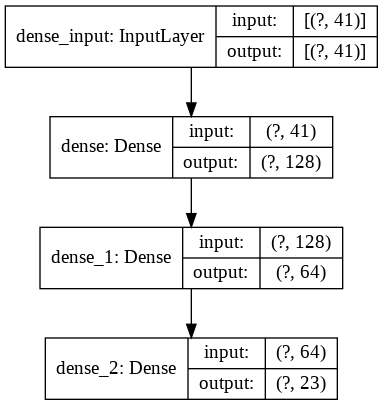

In [ ]:
keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1,validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopper], use_multiprocessing=True, workers=4)
# feature_importance = model.get_weights()

Epoch 1/5
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0348 - val_accuracy: 0.9903
Epoch 2/5
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 3/5
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0342 - val_accuracy: 0.9916
Epoch 4/5
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0438 - val_accuracy: 0.9919
Epoch 5/5
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9925


In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

Train_Accuracy:0.9952767491340637 Train Loss: 0.015751464292407036
Test Accuracy:0.9925382137298584 Test Loss: 0.03745540231466293


In [ ]:
print(y_pred)
print(y_test.values)
# print('Sigmoid + Loss')
# plot_importance(feature_importance)

[11  9  9 ... 11 11  9]
[11  9  9 ... 11 11  9]


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.030479,0.990603,0.034798,0.990316
1,0.025885,0.991933,0.040087,0.988966
2,0.022166,0.992856,0.034226,0.991586
3,0.020663,0.993501,0.043801,0.991943
4,0.018743,0.994155,0.037455,0.992538


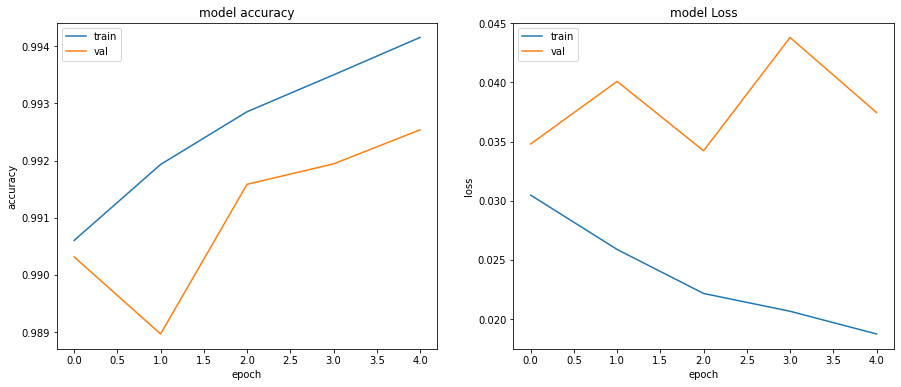

Classification Report:


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       185
           1       0.50      0.11      0.18         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         1
           5       0.95      0.99      0.97       733
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.98      0.93      0.95       313
          11       0.99      1.00      0.99     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       0.98      0.99      0.99       573
          16       0.00      0.00      0.00         1
          17       0.98      0.96      0.97       738
          18       0.99      1.00      0.99       534
  

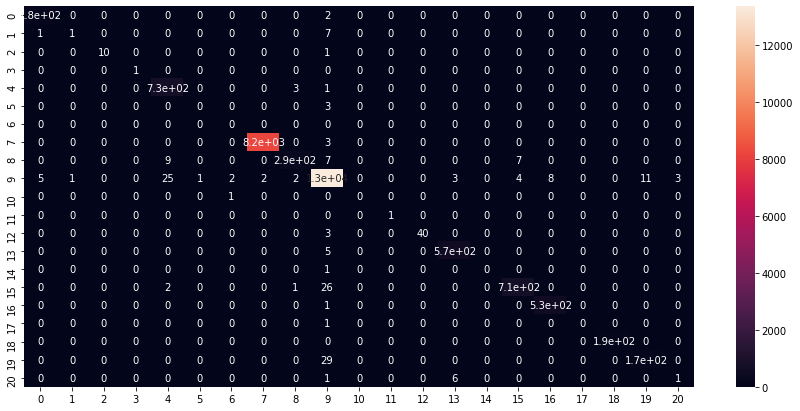

In [ ]:
# Plot the graph accuracy: a ratio of correctly predicted observation to the total observations, Precision is the ratio of 
# correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. 
# Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, 
# but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 
# Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# predict probabilities for test set

Target_names = ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 
                'imap', 'ipsweep', 'land', 'loadmodule', 'multihop',
                'neptune', 'nmap', 'normal', 'perl', 'phf', 
                'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 
                'spy', 'teardrop', 'warezclient', 'warezmaster']
print("Classification Report:\n")
print()
print(classification_report(y_test, y_pred))
# confusion matrix
print("Confusion Matrix:\n")
print()
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,7) )
sns.heatmap(matrix, annot=True)
plt.show()

### PSO with NN

In [ ]:
#fine_tuning,nnunits,dropout,learning_rate
lb=[8,0.001]
ub=[16,0.005]

In [ ]:
from tensorflow.keras import backend as K

def model_design(x): 
  
  print(f"Units : {x[0]}, Learning Rate : {x[1]}")
  K.clear_session()
  input_dim = X_train.shape[1]

  model = Sequential()
  model.add(layers.Dense(x[0], input_dim=input_dim, activation='relu'))
  model.add(layers.Dense(x[0], activation='relu'))
  model.add(layers.Dense(23, activation='softmax'))

  if x[1]< 0.003:
    learning_rate = 0.001
  elif x[1]< 0.0075:
    learning_rate = 0.005
  elif x[1]< 0.015:
    learning_rate = 0.01
  elif x[1]< 0.035:
    learning_rate = 0.02
  elif x[1]< 0.075:
    learning_rate = 0.05
  elif x[1]< 0.125:
    learning_rate = 0.1
  elif x[1]< 0.175:
    learning_rate = 0.15
  else:
    learning_rate = 0.2

  opt = keras.optimizers.Adam(learning_rate=x[1])
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
  return model

In [ ]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
count = 0

In [ ]:
def best_model(x, count = 3):
  model = model_design(x)
  
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test),callbacks=[EarlyStopper], workers=8, use_multiprocessing=True)
  
  train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
  print(f"Train Accuracy:{train_acc} Train Loss: {train_loss}")
  
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")

  count = count
  test_acc_list = []
  test_loss_list = []
  count_no = []
  test_units = []
  test_learning_rate = []

  if test_acc > 0.99 and count < 0:
    # Plot the graph
    count = count - 1
    count_no.append(count)
    test_acc_list.append(test_acc)
    test_loss_list.append(test_loss)
    test_units.append(x[0])
    test_learning_rate.append(x[1])
    # plt.figure(figsize = (15,6))
    # plt.subplot(121)
    # plt.plot(history.history['accuracy'])
    # plt.plot(history.history['val_accuracy'])
    # plt.plot(np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model")
    # plt.title('model accuracy')
    # plt.ylabel('accuracy')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'val'], loc='upper left')
    # plt.subplot(122)
    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    # plt.plot(np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
    # plt.title('model Loss')
    # plt.ylabel('loss')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'val'], loc='upper left')
    # plt.show()

    # predict probabilities for test set
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    print(classification_report(y_test, y_pred))
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (15,7) )
    sns.heatmap(matrix, annot=True)
    plt.show()

    model.save(f"model-{count}-{round(test_acc, 3)}-{round(test_loss, 3)}--Units-{x[0]}--Learning_rate-{x[1]}")
    np.savetxt(f"data-{count}.csv", x, delimiter=',')

  global result
  result = pd.DataFrame()
  result["count_no"] =  count_no 
  result["Test_Acc"] = test_acc_list
  result["Test_Loss"] = test_loss_list 
  result["Units"] = test_units
  result["Learning_rate"] = test_learning_rate 
  
  return test_loss

In [ ]:
xopt, fopt = pso(best_model, lb, ub)
print ("Best position"+str(xopt))
print ("Loss:" + str(fopt))

Units : 15.494689678237926, Learning Rate : 0.0024416533209140195
Epoch 1/10
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1308 - accuracy: 0.9676 - val_loss: 0.0576 - val_accuracy: 0.9869
Epoch 2/10
3150/3150 [==============================] - 8s 2ms/step - loss: 0.0410 - accuracy: 0.9884 - val_loss: 0.0456 - val_accuracy: 0.9866
Epoch 3/10
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0337 - accuracy: 0.9901 - val_loss: 0.0411 - val_accuracy: 0.9894
Epoch 4/10
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0305 - accuracy: 0.9912 - val_loss: 0.0435 - val_accuracy: 0.9898
Epoch 5/10
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0479 - val_accuracy: 0.9908
Epoch 6/10
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0570 - val_accuracy: 0.9877
Epoch 7/10
3150/3150 [==============================] - 8s 3ms/step - 